已知系统函数$H\left(z\right)={1+0.5z^{-1}\over 1-z^{-1}+0.5z^{-2}}$，求零极点图和幅频、相频响应。

C:\Users\DELL\anaconda3\Lib\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


[array([1.]), array([0.25+0.66143783j, 0.25-0.66143783j]), 0.5]
[array([ 0.5, -0.5]), array([ 1. , -0.5,  0.5])]


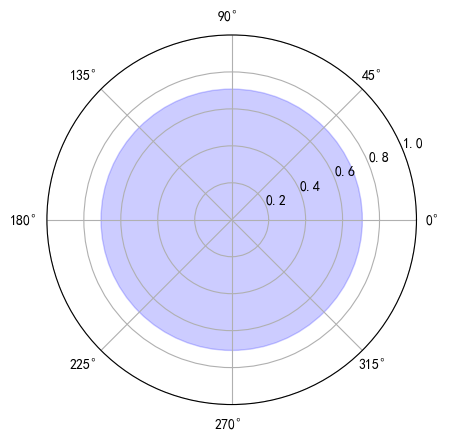

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib.patches import Circle
b=[0,1,-1]
a=[2,-1,1]
[z,p,k]=signal.tf2zpk(b,a)#由系统函数求取零、极点用来实现差分方程
print([z,p,k])
[c,d]=signal.zpk2tf(z,p,k)#由零、极点求系统函数分子分母系数
print([c,d])
theta = np.pi*2
r=np.abs(p[0])
a=plt.subplot(111,polar=True)
circle=Circle((0,0),r,transform=a.transData._b,color="blue",alpha=0.2)
a.add_artist(circle)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来显示负号
plt.show()

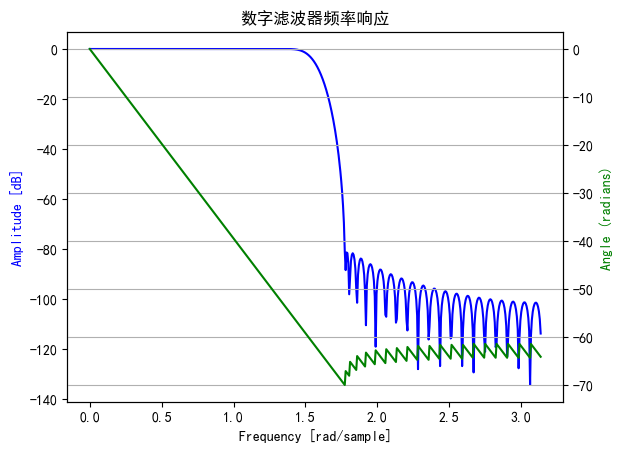

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
b = signal.firwin(80, 0.5, window=('kaiser', 8))#b是线性滤波器的分子
w, h = signal.freqz(b)#w：ndarray计算h的频率，h：ndarray频率响应
fig, ax1 = plt.subplots()
ax1.set_title('数字滤波器频率响应')#设置标题
ax1.plot(w, 20 * np.log10(abs(h)), 'b')#将返回参数w和h返还给图，绘制频率响应freqz
ax1.set_ylabel('Amplitude [dB]', color='b')#纵轴
ax1.set_xlabel('Frequency [rad/sample]')#横轴
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来显示负号
plt.show()